#Workshop Scenario

Trying to build an activity recognition system for several workshop activities.


##Hypthesis 
We can distinguish hammering, screwdriving, sandpapering and sawing, using a wirst worne accelerometer/gyroscope
(so far user dependent).

##Data Recording

The assembly.dat file contains a recording done from a assembly session.

A person was doing the following activities: 

* hammering in nails (label 1)
* screwdring (label 2)
* sandpapering (label 3)
* sawing (label 4)

Label 0 is for doing none of the activities above. The sensor is attached to the subjects right wrist (x axis pointing towards the fingers). 
The sensor was sampled with 100 Hz, it's raw sensor data (not calibrated). The data structure of the file is shown in the header of the file.

In [40]:
from pandas import read_csv
%pylab inline

data = read_csv('./data/assembly.dat',delimiter='\t',skiprows=11,names=['s','usec','ax','ay','az','gx','gy','gz','mx','my','mz','label'])

Populating the interactive namespace from numpy and matplotlib


#Data Exploration
After we read in the data, use the describe() function to get an overview.

In [ ]:
#to get access to a specific data column you can use the following:
data['ax']
data[['ax','ay']]

Use describe() just on the accelerometer data.
Then use describe() on the gyro data.


Actually that does not tell us too much. Quickly plot the accelerometer and gyro data. Can you see a difference between the acceleration and rotational velocity? What is it?

Next use the hist() function on the individual axis of the acceleration and gyroscope.

If you want to print several plots into one figure use hold(True)

In [ ]:
hold(True)
hist(data['ax'])
hist(data['ay'])

##Segmenting the individual activities
Let's look at the hammering, screwdriving, sandpapering and sawing data individually.
You can use pandas filtering on the individual labels e.g.

accel_hammer = data[data['label']==1][['ax','ay','az']]

plot them and calculate the descriptive statistics (e.g. mean, var etc.).

Do you think the activitites can be recognized using these sensors?

Can you distinguish them?


#How to deal with Time Series Data
One of the easiest ways to classify and work with Time Series Data is to use a sliding window, sometimes also called rolling function.


In [39]:
accel_hammer = data[data['label']==1][['ax','ay','az']]
from pandas.stats.moments import rolling_apply

method = var
wsize = 50

accel_var_hammer = rolling_apply(accel_hammer, wsize, method).dropna()


#Finding Features

You can use scatter() to plot the different features against each other ...
If you use hold on it can give you a hint if the data is distinguishable.

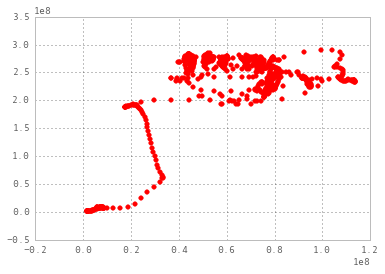

In [38]:
scatter(accel_var_hammer['az'],accel_var_hammer['ay'],color='red')